In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.utils import to_categorical


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training shape: (50000, 32, 32, 3)
Testing shape: (10000, 32, 32, 3)


In [3]:
class_names = ['Airplane','Automobile','Bird','Cat','Deer',
               'Dog','Frog','Horse','Ship','Truck']


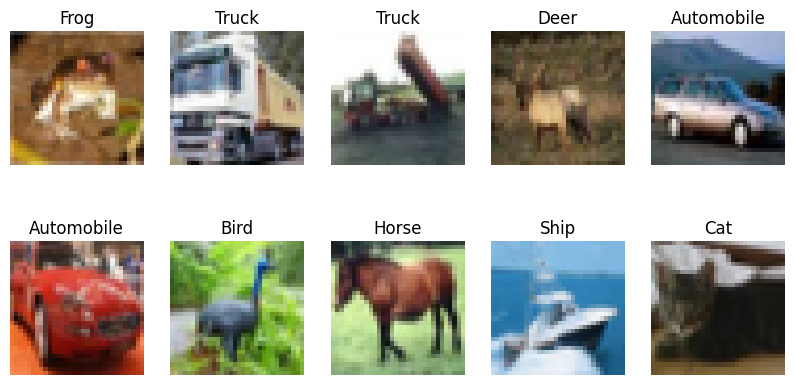

In [4]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

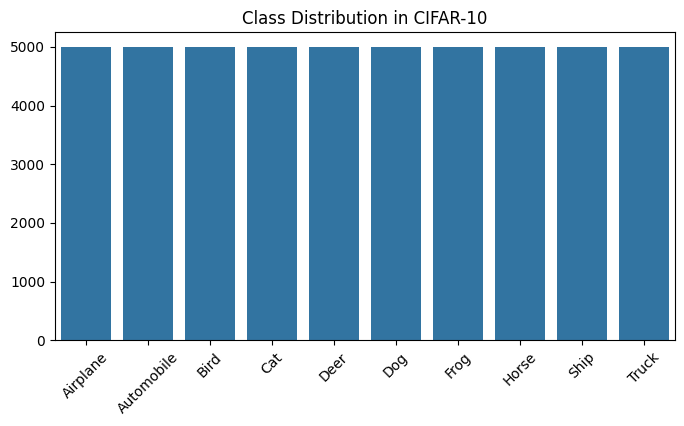

In [5]:
unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(8,4))
sns.barplot(x=class_names, y=counts)
plt.xticks(rotation=45)
plt.title("Class Distribution in CIFAR-10")
plt.show()

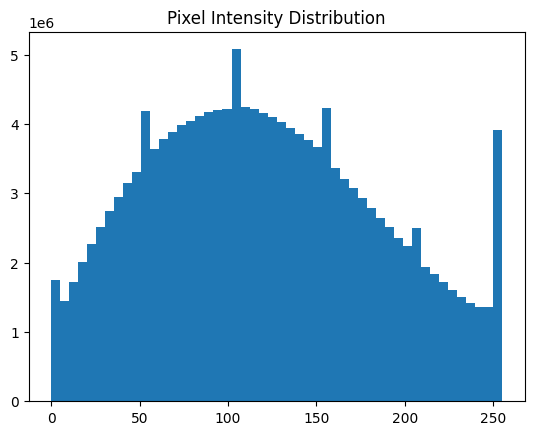

In [7]:
plt.hist(x_train.ravel(), bins=50)
plt.title("Pixel Intensity Distribution")
plt.show()

In [8]:
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32') / 255.0

In [9]:
x_train_seq = x_train.reshape(-1, 32, 96)
x_test_seq  = x_test.reshape(-1, 32, 96)

print(x_train_seq.shape)

(50000, 32, 96)


In [10]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test, 10)

In [11]:
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=False),
                  input_shape=(32, 96)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 256)            │       230,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,498 (966.79 KB)

 Trainable params: 247,498 (966.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    x_train_seq, y_train_cat,
    validation_split=0.2,
    epochs=10,
    batch_size=128
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.2761 - loss: 1.9817 - val_accuracy: 0.4063 - val_loss: 1.6534
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4183 - loss: 1.6063 - val_accuracy: 0.4627 - val_loss: 1.5075
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4670 - loss: 1.4792 - val_accuracy: 0.4695 - val_loss: 1.4653
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5014 - loss: 1.3928 - val_accuracy: 0.4943 - val_loss: 1.3971
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5228 - loss: 1.3291 - val_accuracy: 0.5059 - val_loss: 1.3716
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5445 - loss: 1.2688 - val_accuracy: 0.5159 - val_loss: 1.3551
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5603 - loss: 1.2168 - val_accuracy: 0.5346 - val_loss: 1.3080
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5792 - loss: 1.1742 - val_accu

In [13]:
test_loss, test_acc = model.evaluate(x_test_seq, y_test_cat)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5572 - loss: 1.2452
Test Accuracy: 0.557699978351593


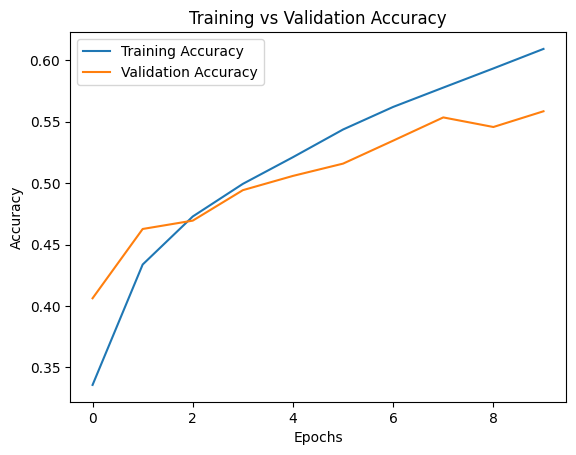

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()